# Step by Step guide on how to plot S Chart

S Chart is a control chart for process variation, it is a variable control chart, which means that the type of observation required for it is a **continuous one**

In this section, we'll take you through on how to plot a S
chart.

In [1]:
#Import required package.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

### Importing data to be used.

In [2]:
df = pd.read_csv('data.csv')

In [3]:
#Printing the first five rows of the dataset
df.head()

,sample_number,A,B,C,D,E
0,1,11.3,10.5,12.4,12.2,12.0
1,2,9.6,11.7,13.0,11.4,12.8
2,3,11.4,12.4,11.7,11.4,12.4
3,4,12.0,11.9,13.2,11.9,12.2
4,5,12.4,11.9,11.7,11.6,10.5


### Next, we need to find the Standard deviation of each sub group.

In [4]:
df['std'] = np.std(df.iloc[:,1::],axis = 1)

In [5]:
df.head()

,sample_number,A,B,C,D,E,std
0,1,11.3,10.5,12.4,12.2,12.0,0.696850
1,2,9.6,11.7,13.0,11.4,12.8,1.216553
2,3,11.4,12.4,11.7,11.4,12.4,0.454313
3,4,12.0,11.9,13.2,11.9,12.2,0.492341
4,5,12.4,11.9,11.7,11.6,10.5,0.624179


### Next, we find the mean value for the Standaart deviation column

In [6]:
s_bar = df['std'].mean()

### Control limits for S chart is as follows:

UCL = B4 * s_bar

LCL = B3 * s_bar

CL = s_bar

where:

s_bar = The mean of Standard deviation
The B4 and B3 values depends on the number of observations per Sample number(m) , in this case my m = 5, so we're to check for B4 and B3 when m = 5 , the quality control table to check for S constant can be found <a href='https://www.mymathtables.com/statistic/xbar-rchart-table.html'>here</a>

Alternatively, let's we can also webscrape it here:

In [7]:
#using requests to connect to the webpage
req = requests.get('https://www.mymathtables.com/statistic/xbar-rchart-table.html')

In [8]:
soup = BeautifulSoup(req.text,'lxml')

In [9]:
#Webscraping the table
table = pd.read_html(str(soup.find('table')),flavor = 'lxml')[0]

In [10]:
table

,Sample(Size = m),A2,A3,d2,D3,D4,B3,B4
0,2.0,1.880,2.659,1.128,0,3.267,0,3.267
1,3.0,1.023,1.954,1.693,0,2.574,0,2.568
2,4.0,0.729,1.628,2.059,0,2.282,0,2.266
3,5.0,0.577,1.427,2.326,0,2.114,0,2.089
4,6.0,0.483,1.287,2.534,0,2.004,0.030,1.970
5,7.0,0.419,1.182,2.704,0.076,1.924,0.118,1.882
6,8.0,0.373,1.099,2.847,0.136,1.864,0.185,1.815
7,9.0,0.337,1.032,2.970,0.184,1.816,0.239,1.761
8,10.0,0.308,0.975,3.078,0.223,1.777,0.284,1.716
9,11.0,0.285,0.927,3.173,0.256,1.744,0.321,1.679


### From the table above, we can see that the corresponding value for B3 and B4 when is m is 5 is 0.118 and 1.882, we can now find UCL and LCL for S chart

In [11]:
B3 = 0.118
print('B3 value is: ',B3)
B4 = 1.882
print('B4 value is: ',B4)
UCL = B4 * s_bar
print('UCL value is: ',UCL)
LCL = B3 * s_bar
print('LCL value is: ',LCL)
CL = s_bar 
print('CL value is: ',CL)

B3 value is:  0.118
B4 value is:  1.882
UCL value is:  1.4053822042009745
LCL value is:  0.08811641875436503
CL value is:  0.7467493114776698


#### Now, let's plot the Chart:

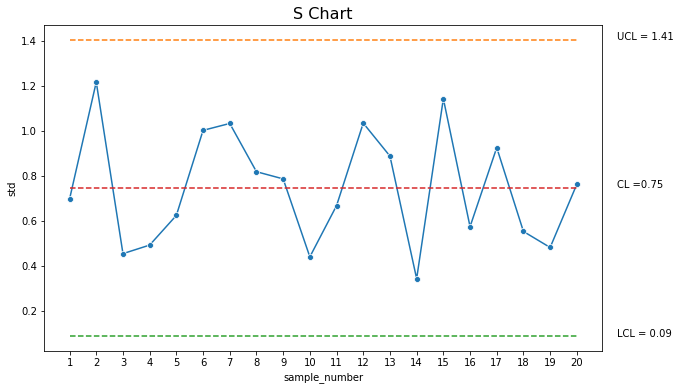

In [12]:
plt.figure(figsize = [10,6])
sns.lineplot(data = df, x = 'sample_number', y = 'std', marker = 'o')
sns.lineplot(data = df, x = 'sample_number', y = UCL,linestyle = 'dashed')
sns.lineplot(data = df, x = 'sample_number', y =  LCL,linestyle = 'dashed')
sns.lineplot(data = df, x = 'sample_number', y = CL,linestyle = 'dashed')
plt.text(df.sample_number.max() + 1.5,LCL, 'LCL = ' + str(round(LCL,2)))
plt.text(df.sample_number.max() + 1.5,UCL,'UCL = ' + str(round(UCL,2)))
plt.text(df.sample_number.max() + 1.5,CL,'CL =' + str(round(CL,2)))
plt.title('S Chart',fontsize = 16);
plt.xticks(range(min(df['sample_number']),max(df['sample_number'])+1));
plt.show()